In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import LSTM, Dense
from keras.layers import GRU 
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [2]:
exchange_data = pd.read_csv('GBPUSD-1HOUR.csv')
exchange_data.head()

,time,open,high,low,close,Volume,Volume MA
0,2021-02-25T03:00:00Z,1.41366,1.41456,1.41348,1.41446,608,1638.8
1,2021-02-25T04:00:00Z,1.41446,1.41641,1.41432,1.41598,832,1517.6
2,2021-02-25T05:00:00Z,1.41598,1.41698,1.41598,1.41628,1006,1442.8
3,2021-02-25T06:00:00Z,1.41628,1.41668,1.41520,1.41604,995,1398.3
4,2021-02-25T07:00:00Z,1.41604,1.41616,1.41220,1.41488,1971,1429.2


In [3]:
exchange_data["time"] = pd.to_datetime(exchange_data["time"])
ind_exchange_data = exchange_data.set_index(["time"], drop=True)
ind_exchange_data.head()

,open,high,low,close,Volume,Volume MA
time,,,,,,
2021-02-25 03:00:00+00:00,1.41366,1.41456,1.41348,1.41446,608,1638.8
2021-02-25 04:00:00+00:00,1.41446,1.41641,1.41432,1.41598,832,1517.6
2021-02-25 05:00:00+00:00,1.41598,1.41698,1.41598,1.41628,1006,1442.8
2021-02-25 06:00:00+00:00,1.41628,1.41668,1.41520,1.41604,995,1398.3
2021-02-25 07:00:00+00:00,1.41604,1.41616,1.41220,1.41488,1971,1429.2


In [4]:
data_frame = ind_exchange_data.sort_index(axis=1 ,ascending=False)

end_date = '01-02-23'
cut_off_date = pd.Timestamp(end_date)
data_frame = data_frame.loc[:cut_off_date]
data_frame.head()

/var/folders/qs/tq01j0l577ddz8gg_tnvhl6m0000gn/T/ipykernel_51095/2698607082.py:5: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  data_frame = data_frame.loc[:cut_off_date]


,open,low,high,close,Volume MA,Volume
time,,,,,,
2021-02-25 03:00:00+00:00,1.41366,1.41348,1.41456,1.41446,1638.8,608
2021-02-25 04:00:00+00:00,1.41446,1.41432,1.41641,1.41598,1517.6,832
2021-02-25 05:00:00+00:00,1.41598,1.41598,1.41698,1.41628,1442.8,1006
2021-02-25 06:00:00+00:00,1.41628,1.41520,1.41668,1.41604,1398.3,995
2021-02-25 07:00:00+00:00,1.41604,1.41220,1.41616,1.41488,1429.2,1971


<AxesSubplot: xlabel='time'>

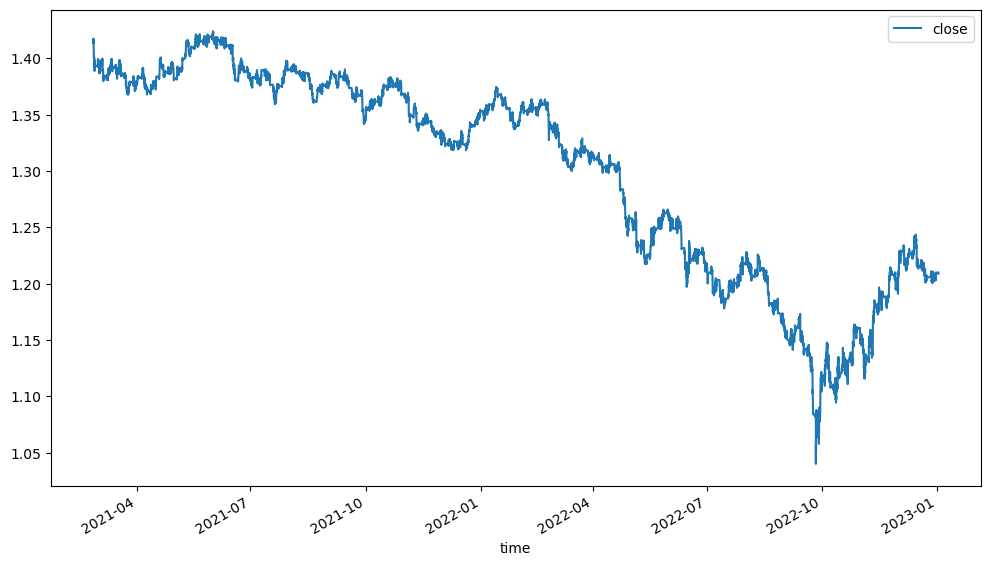

In [5]:
df = data_frame[["close"]]

#plotting dataset to visualize the pattern of prices over the years

df.plot(kind='line',figsize=(12,7))

In [6]:
diff = df.index.values[-1] - df.index.values[0]



days = diff.astype('timedelta64[D]')
days = days / np.timedelta64(1, 'D')
years = int(days/365)
print("Total data: %d years"%years)
print("80 percent data = 2010 to %d"%(2010 + int(0.8*years)))

Total data: 1 years
80 percent data = 2010 to 2010
